GRADINET DESCENT 

batch gradint descnt for 2D data 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

In [ ]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)



array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

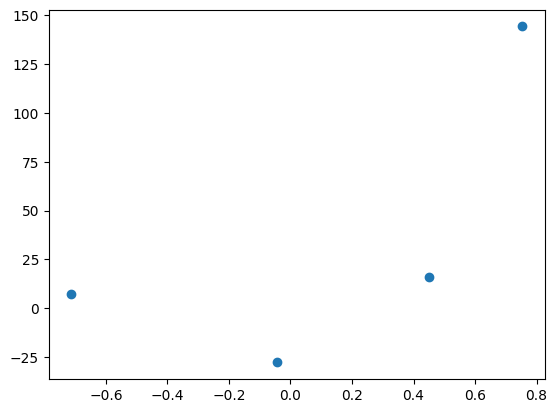

In [6]:
plt.scatter(x,y) 

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [8]:
lr.coef_

array([78.35063668])

In [9]:
lr.intercept_

np.float64(26.15963284313262)

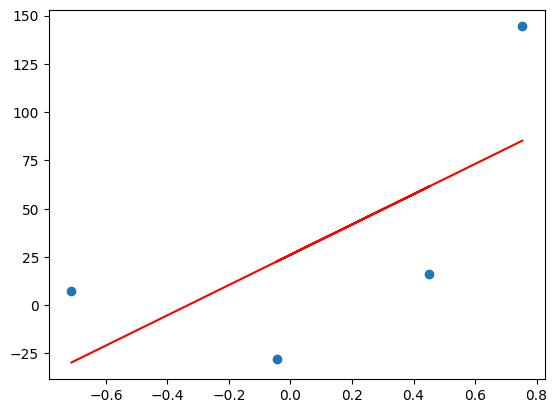

In [10]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

making our own gd regressor

In [ ]:
class GDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_=100
        self.intercept_=-120
        self.lr=learning_rate
        self.epochs=epochs
    
    def fit(self,x_train,y_train):
        for i in range(self.epochs):

            loss_slope_m=-2 * np.sum((y-self.coef_*x_train.ravel())*x.ravel())
            loss_slope_b=-2 * np.sum((y-self.coef_*x_train.ravel()))
            self.intercept_=self.intercept_-(self.lr*loss_slope_b)
            self.coef_=self.coef_-(self.lr*loss_slope_m)
            y_pred=self.coef_*x.ravel()+self.intercept_
            plt.scatter(x_train,y_train)
            plt.plot(x,y_pred)
        print(self.coef_,self.intercept_)
    def predict(self,x_test):
        return self.coef_*x_test.ravel()+self.intercept_
        

89.10387037780363 26.980613721923326


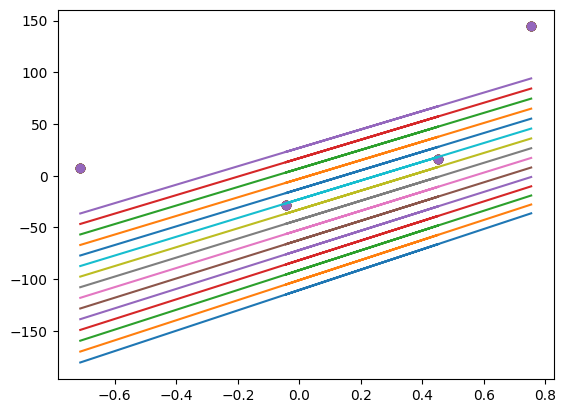

In [43]:
gd=GDRegressor(0.05,15)
gd.fit(x,y)



In [41]:
from sklearn.metrics import r2_score
y_pred=gd.predict(x)
r2_score(y,y_pred)

0.4343008658054429